In [140]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import geopandas as gd
from shapely.geometry import Point, Polygon
%matplotlib inline

df = pd.read_csv("fac.csv")
neighborhoods = gd.read_file("Neighborhoods/Neighborhoods_.shp")

In [277]:
# Refine data. Remove inactive facilities
df2 = df[df['inactive'] != 't'].reset_index()

<AxesSubplot:title={'center':'Number of facilities in Pittsburgh Neighborhoods'}, xlabel='neighborhood'>

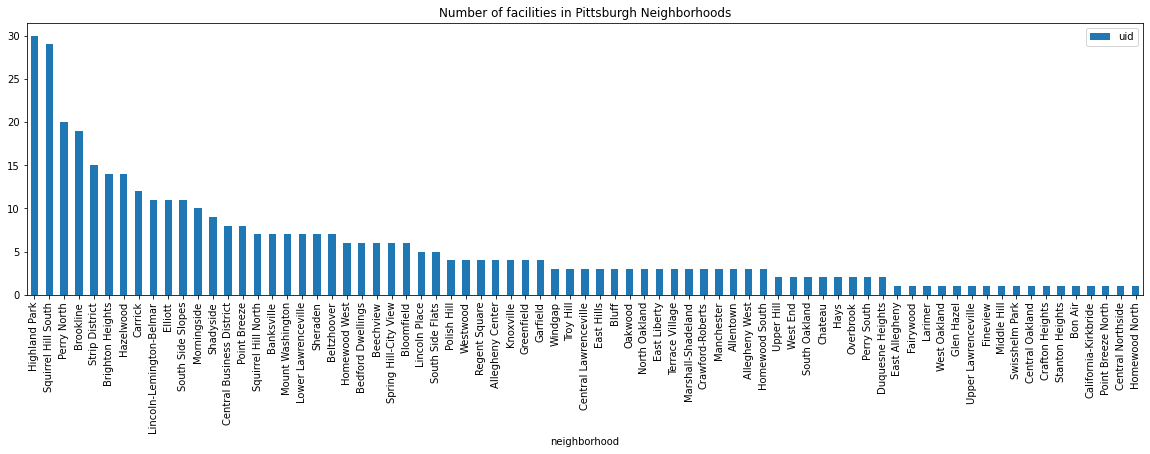

In [298]:
# Bar graph of facilities in each neighborhood
df3 = df2[['neighborhood','type']].sort_values('neighborhood').reset_index()
df3['uid'] = 1

df4 = df3.groupby('neighborhood').sum().drop('index',axis=1).sort_values('uid', ascending=False)
df4.plot.bar(figsize=(20,5), title = 'Number of facilities in Pittsburgh Neighborhoods')


In [ ]:
# Pie charts

C:\Users\minha\anaconda3\envs\cmpinf0010\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

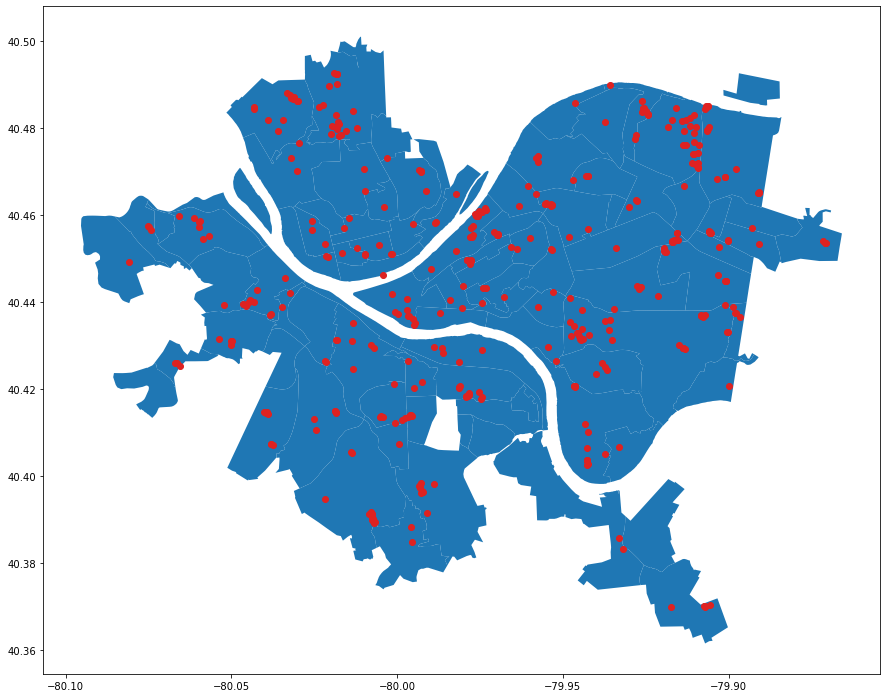

In [310]:
# Plotting facilities on map
crs = {'init' : 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]

geodata = gd.GeoDataFrame(df, crs = crs, geometry = geometry)

fig, ax = plt.subplots(figsize=(15,15))
neighborhoods.plot(ax=ax,alpha=1)
geodata.plot(ax=ax, color = '#de2221')